# Laboratorio No. 3

# Instrucciones: Realice un programa en Python para resolver el siguiente problema.
Problema 1:
Anualmente en Estados Unidos, cerca de 1.5 millones de estudiantes de Educación Superior realizan un examen de aptitud escolar (SAT, por sus siglas en inglés). Aproximadamente el 80% de las universidades e instituciones de Educación Superior usan las calificaciones obtenidas por los estudiantes en este examen como criterio de admisión (College Board, marzo de 2006).
Un servicio de evaluaciones educativas ha recolectado la información del examen del SAT y la información del GPA de una muestra de 1000 estudiantes de una universidad (no se indica el nombre por temas de confidencialidad). El SAT consiste en múltiples secciones medibles, las cuales incluye: Matemática, lectura y escritura. Se prueba lectura y escritura juntas y Matemática se evalúa en una escala del 200 al 800. Una calificación perfecta es 1600 (800 en ambas secciones). En el caso de GPA es un término que se emplea para asignar un valor numérico a las puntuaciones acumuladas por un estudiante en el sistema estadounidense. Este valor puede ser anual o agruparse en períodos académicos y se calcula en una escala de 0 a 4 puntos (en algunos casos puede ser hasta 5).
Se tiene el siguiente juego de datos del archivo satgpa.csv, el cual tiene la siguiente información:
Variables:
• sex - sexo del estudiante (1=Mujer y 2=Hombre)
• sat_v - percentil SAT verbal
• sat_m - percentil SAT en Matemática
• sat_sum - total del percentil del SAT verbal y Matemática
   
• hs_gpa - promedio de calificaciones de la escuela secundaria
• fy_gpa - promedio de calificaciones del primer año de la universidad


Se tiene interés en determinar si el “sexo”, el “total del percentil de SAT verbal y Matemática” y el “promedio de calificaciones de la escuela secundaria” predicen en forma lineal el “promedio de calificaciones de primer año de la universidad”. Utilice el método del descenso del gradiente para encontrar los parámetros correspondientes (thetas). Estas características podrían utilizarse en un futuro para calificar a las personas para su ingreso a esta universidad.


In [52]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('satgpa.csv')


In [53]:
df.head(3)


,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25


# Ecuaciones vistas en clase

In [37]:
# linear cost
def linear_cost(X, y, theta):
    h = X @ theta
    return ((h - y) ** 2).sum() / (2*len(X))


In [38]:
#linear cost gradient
def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / (2*len(X))

In [39]:
#gradient descent
def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate=0.01, 
    threshold=0.001,
    max_iter=1000
):
    theta = theta_0
    iteration = 0
    costs = []
    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))

    return theta, costs

In [40]:
df['sex'] = df['sex'].replace(2,0)

In [42]:
x = df.copy()
y = np.array(df['fy_gpa']).reshape(len(x), 1)

In [43]:
x.drop(columns=['sat_v','sat_m','fy_gpa' ], inplace=True)

X = np.hstack((
    np.ones(1000).reshape(1000, 1),
    x
))


In [54]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [55]:
r_theta, costs = gradient_descent(
    X, y, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.00001,
    threshold=10
)
r_theta


array([[0.07574147],
       [0.70633355],
       [0.01491715],
       [0.2107555 ]])

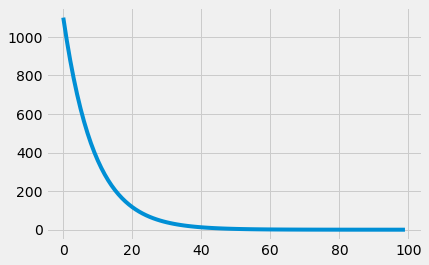

In [56]:
with plt.style.context('fivethirtyeight'):
    plt.plot(costs)
